# Laboratorio 3 - Variables aleatorias

**Instrucciones**: Escriba programas en Python para resolver los ejercicios.

In [34]:
import itertools as it
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

def graphs_creators(X,P):
    plt.bar(X, P, tick_label=[str(k) for k in X])
    plt.xlabel("Resultado del lanzamiento")
    plt.ylabel("Probabilidad")
    plt.title("Función de Masa de Probabilidad (PMF)")
    plt.ylim(0, max(P)+0.1)
        
    # Mostrar valores en las barras
    for i, prob in zip(X, P):
        plt.text(i, prob + 0.05, str(prob), ha='center', fontsize=12)
        
    plt.show()

    # Gráfico de escalón
    acum = 0
    for i in range(len(X)-1):
        acum += P[i]
        plt.step([X[i],X[i+1]],[acum, acum],where='pre',color='blue')
    plt.step([X[-1], X[-1]+1], [sum(P), sum(P)], where='pre',color='blue')

    plt.xlabel("Resultado del lanzamiento")
    plt.ylabel("Probabilidad acumulada")
    plt.title("Función de Distribución Acumulada (CDF)")
    plt.xticks(X, [str(k) for k in X])
    plt.yticks(np.linspace(0,1,int(1/P[0])+1))
    plt.show()

## Ejercicio 1. 

Una caja contiene 5 pelotas blancas y 3 rojas. Suponga que se extraen 2 pelotas al azar sin reemplazo y $X$ denota el número de pelotas blancas. 

a. Determine $p(x)$ la función de masa de probabilidad de $X$.

b. Determine $F(x)$ la función de distribución acumulada de $X$.

c. Trace las representaciones gráficas de $p(x)$ y $F(x)$.

d. Encuentre $E[x]$ y $Var(x)$.

Piecewise((0.107142857142857, x >= 0), (0.535714285714286, x >= 1), (0.357142857142857, x >= 2))


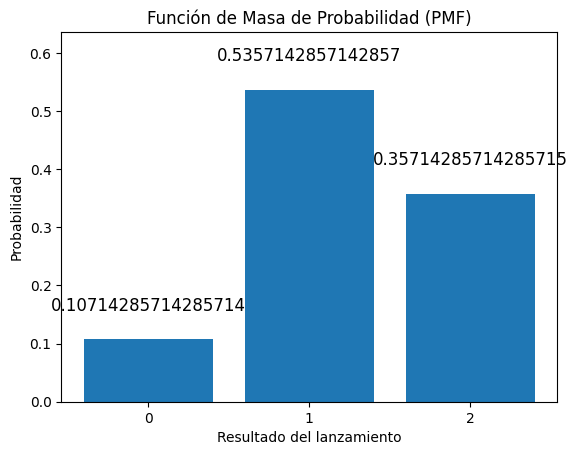

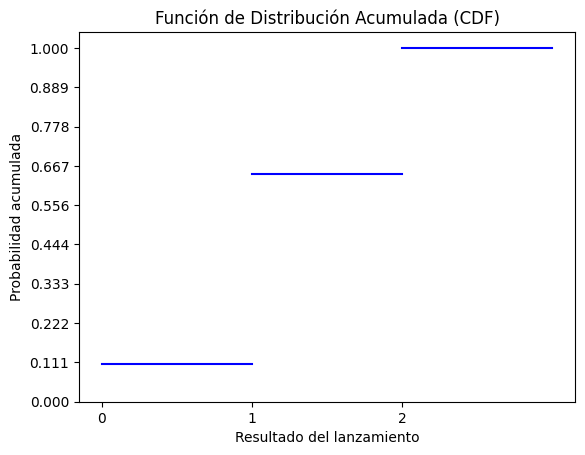

1.25


In [57]:

#a)
x = sy.symbols('x', real=True)

cantidad = sy.binomial(8,2)
white_0_prob = float((sy.binomial(5,0) * sy.binomial(3,2))/cantidad)
white_1_prob = float((sy.binomial(5,1) * sy.binomial(3,1))/cantidad)
white_2_prob = float((sy.binomial(5,2)* sy.binomial(3,0))/cantidad)

##Respuesta
p_x = sy.Piecewise((white_0_prob,x==0),(white_1_prob, x==1),(white_2_prob, x==2))

#b)

f_x = sy.Piecewise((white_0_prob,x>=0),(white_1_prob, x>=1),(white_2_prob, x>=2))

##Respuesta
print(f_x)

#c)
X = [0, 1, 2]
P = [white_0_prob, white_1_prob, white_2_prob]

graphs_creators(X,P)

#d)
def valor_esperado(x_list, p_X):
    return sum([x_list[i]*P[i]for i in range(len(P))])

e_X = valor_esperado(X,P)

print(e_X)

var = valor_esperado([x**2 for x in X], P)


## Ejercicio 2.

Repita el Ejercicio 1 suponiendo que las pelotas se extraen con reemplazo.

## Ejercicio 3.

Sea $X$ una variable aleatoria que da el número de ases en una extracción al azar de 4 cartas de una baraja ordinaria de 52 cartas.

a. Determine $p(x)$ la función de masa de probabilidad de $X$.

b. Determine $F(x)$ la función de distribución acumulada de $X$.

c. Trace las representaciones gráficas de $p(x)$ y $F(x)$.

d. Encuentre $E[X]$ y $Var(X)$.

d. Calcule las probabilidades de $P(\{X\geq 2\})$ y $P(\{1\leq X\leq 3\})$.

0


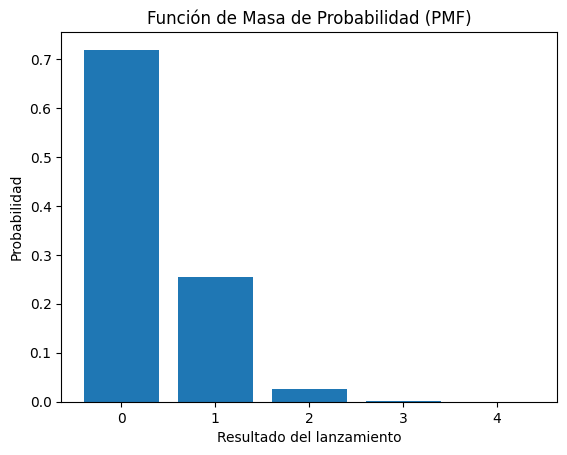

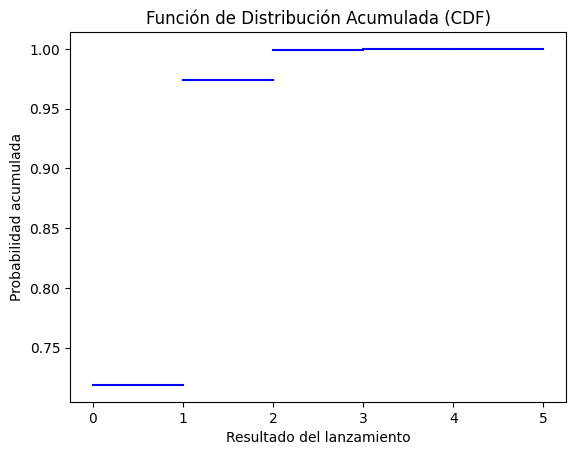

In [ ]:
import itertools as it
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x', real=True)
c = sy.symbols('c', real=True)
t = sy.symbols('t', real=True)

p4a = (sy.binomial(4,4) * sy.binomial(48, 0))/(sy.binomial(52, 4))
p3a = (sy.binomial(4,3) * sy.binomial(48, 1))/(sy.binomial(52, 4))
p2a = (sy.binomial(4,2) * sy.binomial(48, 2))/(sy.binomial(52, 4))
p1a = (sy.binomial(4,1) * sy.binomial(48, 3))/(sy.binomial(52, 4))
p0a = (sy.binomial(4,0) * sy.binomial(48, 4))/(sy.binomial(52, 4))

p = sy.Piecewise((p4a, x==4), (p3a, x==3), (p2a, x==2), (p1a, x==1), (p0a, x==0), (0, True))
F0a = sy.integrate(p, (x, 0, x))
F1a = sy.integrate(p, (x, 1, x))
F2a = sy.integrate(p, (x, 2, x))
F3a = sy.integrate(p, (x, 3, x))
F4a = sy.integrate(p, (x, 4, x))

F = sy.Piecewise((F4a, x>=4), (F3a, x>=3), (F2a, x>=2), (F1a, x>=1), (F0a, x>=0), (0, True))

# Define X and P
X = [0, 1, 2, 3, 4]
P = [p0a.evalf(), p1a.evalf(), p2a.evalf(), p3a.evalf(), p4a.evalf()]

# Gráfico de densidad probabilística
plt.bar(X, P, tick_label=[str(k) for k in X])
plt.xlabel("Resultado del lanzamiento")
plt.ylabel("Probabilidad")
plt.title("Función de Masa de Probabilidad (PMF)")
plt.show()

# Gráfico de densidad acumulada
acum = 0
for i in range(len(X)-1):
    acum += P[i]
    plt.step([X[i],X[i+1]],[acum, acum],color='blue')
plt.step([X[-1], X[-1]+1], [sum(P), sum(P)],color='blue')

plt.xlabel("Resultado del lanzamiento")
plt.ylabel("Probabilidad acumulada")
plt.title("Función de Distribución Acumulada (CDF)")
plt.show()



## Ejercicio 4.

Considere la función:
$$f(x)=\left\{\begin{array}{rl}ce^{-3x},& x>0\\ 0,& x\leq 0\end{array}\right.$$

a. Encuentre el valor de $c\in \mathbb{R}$ tal que $f$ sea una función de densidad de probabilidad de una variable aleatoria continua $X$.

b. Determine $F(x)$ la función de distribución acumulada de la variable aleatoria $X$.

c. Trace las representaciones gráficas de $f(x)$ y $F(x)$.

d. Encuentre $E[X]$ y $Var(X)$.

e. Calcule las probabilidades de $P(\{1\leq X\leq 2\})$, $P(X\geq 3)$, $P\left(\{2\leq X\leq 3\}|\{X> 1\}\right)$.


a)
La constante c es: [3]


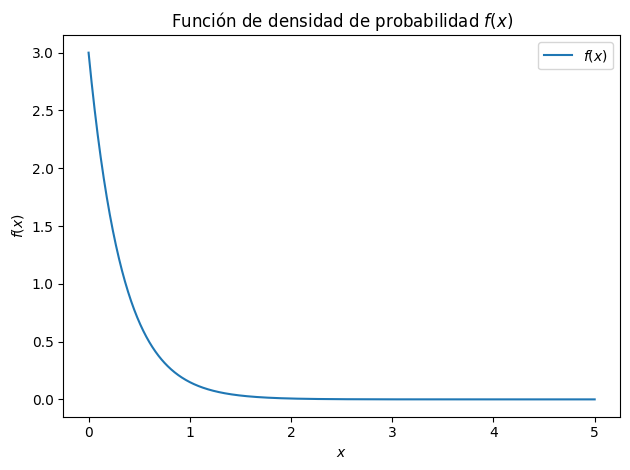

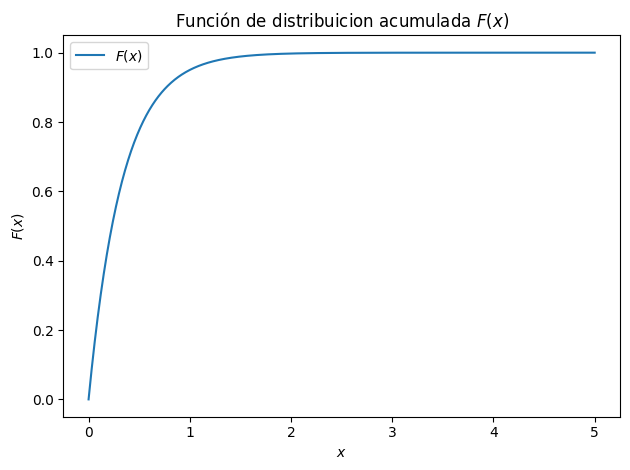

d)
P(1<=X<=2) = 0.0473083161911976
P(X>=3) = 0.000123409804086649
P(2<=x<=3)|P(x>1) = 0.0473083161911986


In [7]:
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x', real=True)
c = sy.symbols('c', real=True)
t = sy.symbols('t', real=True)

f = c * sy.exp(-3*x)

# Inciso a
antid = sy.integrate(f, (x, 0, sy.oo))
ansa = sy.solve(antid - 1, c)

print('a)')
print('La constante c es:', ansa)

# Inciso b
f = ansa[0] * sy.exp(-3*t)
antid = sy.integrate(f, (t, 0, x))

# Inciso c
f = ansa[0] * sy.exp(-3*x)
# Graficar f(x)
f1_lambdified = sy.lambdify(x, f, modules=['numpy'])
x_vals = np.linspace(0, 5, 1000)
f1_vals = f1_lambdified(x_vals)

plt.plot(x_vals, f1_vals, label='$f(x)$')
plt.title('Función de densidad de probabilidad $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

plt.tight_layout()
plt.show()

# Graficar F(x)
F_lambdified = sy.lambdify(x, antid, modules=['numpy'])
x_vals = np.linspace(0, 5, 1000)
F_vals = F_lambdified(x_vals)


plt.plot(x_vals, F_vals, label='$F(x)$')
plt.title('Función de distribuicion acumulada $F(x)$')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend()

plt.tight_layout()
plt.show()

# Inciso d
f = ansa[0] * x * sy.exp(-3*x)
E = sy.integrate(f, (x, 0, sy.oo))
VAR = sy.integrate(x**2 * f, (x, 0, sy.oo)) - E**2

# Inciso e
P2 = antid.subs(x, 2).evalf()
P1 = antid.subs(x, 1).evalf()
ansd1 = P2 - P1

P3 = antid.subs(x, 3).evalf()
ansd2 = 1 - P3

P23 = antid.subs(x, 3).evalf() - antid.subs(x, 2).evalf()
P1M = 1 - antid.subs(x, 1).evalf()
ansd3 = P23 / P1M

print('d)')
print('P(1<=X<=2) =', ansd1)
print('P(X>=3) =', ansd2)
print('P(2<=x<=3)|P(x>1) =', ansd3)

## Ejercicio 5.

Sea $X$ una variable aleatoria continua con función de densidad de probabilidad:
$$f(x)=\left\{\begin{array}{rl}\frac{x}{3},& 0\leq x\leq 2\\ -\frac{2}{3}\left(x-3\right),& 2<x\leq 3\end{array}\right.$$

a. Determine $F(x)$ la función de distribución acumulada de la variable aleatoria $X$.

b. Trace las representaciones gráficas de $f(x)$ y $F(x)$.

c. Encuentre $E[X]$ y $Var(X)$.

d. Determine el valor de $a$ tal que $P(\{X>a\})=\frac{1}{2}$.

Sean $A=\{2\leq X\leq 3\}$ y $B=\{X>1\}$ eventos. 

e. Calcule $P(A|B)$ y $P(B|A)$.

f. ¿Son $A$ y $B$ eventos independientes?

## Ejercicio 6.
Sea $X$ una variable aleatoria continua que representa el tiempo (en minutos) entre llegadas de clientes a un banco. Si la función de densidad de probabilidad de $X$ es:

$$f(x)=\left\{\begin{array}{rl}\frac{2}{3}e^{-2x/3},& x\geq 0\\ 0,& \text{caso contrario}\end{array}\right.$$
					
a. ¿Qué es más probable? Que llegue un cliente en los próximos 30 segundos, o que no llegue ningún cliente en los próximos 2 minutos.

b. ¿Cuál es la probabilidad de que no llegue ningún cliente en el minuto siguiente, dado que no ha llegado ningún cliente en el último minuto?

c. Calcule $E[X]$ y $Var(X)$.

In [31]:
import scipy as sc
import sympy as sy
import numpy as np

x = sy.symbols('x', real=True)
c = sy.symbols('c', real=True)
t = sy.symbols('t', real=True)

f = (2/3)*sy.exp(-2*t/3)
antid = sy.integrate(f, (t, 0, x))

# Inciso a
Pmitad = antid.subs(x, 0.5).evalf()
P2 = antid.subs(x, 2).evalf()
P2 = 1 - P2

print('a)')
print('Probabilidad que llegue un cliente en 30 segundos', Pmitad)
print('Probabilidad que no llegue un cliente en 2 minutos', P2)

# Inciso b
# Caso no ha llegado nadie en el ultimo minuto
# [no llego, llego], [no llego, no llego]
PNadie1 = antid.subs(x, 1).evalf()
PNadie1 = 1 - PNadie1

# Caso no ha llegado nadie en el minuto siguiente
# [no llego, no llego], [llego, no llego] 

# Intersección de los eventos [no llego, no llego]
PNadie2 = antid.subs(x, 2).evalf()
PNadie2 = 1 - PNadie2

ansb = PNadie2 / PNadie1
print('b)')
print('Probabilidad que no llegue nadie en el minuto siguiente dado que no llego nadie en el ultimo minuto', ansb)

# Inciso c
f = (2/3)*sy.exp(-2*x/3)
E = sy.integrate(x*f, (t, 0, sy.oo))
VAR = sy.integrate(x**2 * f, (t, 0, sy.oo)) - E**2

a)
Probabilidad que llegue un cliente en 30 segundos 0.283468689426211
Probabilidad que no llegue un cliente en 2 minutos 0.263597138115727
b)
Probabilidad que no llegue nadie en el minuto siguiente dado que no llego nadie en el ultimo minuto 0.513417119032592
